# Install

In [1]:
%pip install tensorflow tf2onnx matplotlib numpy opencv-python scipy

  Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.32.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.75.1-cp312-cp312-macosx_11_0_universal2.whl.metadata (3.7 kB)
  Using cached tensorb

In [2]:
%pip install --upgrade --force-reinstall numpy h5py tensorflow

  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached h5py-3.15.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached protobuf-6.32.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-non

# import and constant

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import string
import os
import shutil

In [4]:
dataset_dir = './dataset'
model_name = 'sign_classifier'

# Dataset

In [11]:
!curl -L -o ./alfabet-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/achmadnoer/alfabet-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  114M  100  114M    0     0  1618k      0  0:01:12  0:01:12 --:--:-- 1140k1453k      0  0:01:20  0:00:21  0:00:59 1187k  1506k      0  0:01:17  0:00:31  0:00:46 1654k  1504k      0  0:01:18  0:00:33  0:00:45 1395k  0:00:36  0:00:40 1670k 0  1651k      0  0:01:11  0:01:01  0:00:10 1762k


In [14]:
!unzip ./alfabet-bisindo.zip -d .

Archive:  ./alfabet-bisindo.zip
  inflating: ./Citra BISINDO/A/body dot (1).jpg  
  inflating: ./Citra BISINDO/A/body dot (2).jpg  
  inflating: ./Citra BISINDO/A/body dot (3).jpg  
  inflating: ./Citra BISINDO/A/body dot (4).jpg  
  inflating: ./Citra BISINDO/A/body white (1).jpg  
  inflating: ./Citra BISINDO/A/body white (2).jpg  
  inflating: ./Citra BISINDO/A/body white (3).jpg  
  inflating: ./Citra BISINDO/A/body white (4).jpg  
  inflating: ./Citra BISINDO/A/wall white (1).jpg  
  inflating: ./Citra BISINDO/A/wall white (2).jpg  
  inflating: ./Citra BISINDO/A/wall white (3).jpg  
  inflating: ./Citra BISINDO/A/wall white (4).jpg  
  inflating: ./Citra BISINDO/B/body dot (1).jpg  
  inflating: ./Citra BISINDO/B/body dot (2).jpg  
  inflating: ./Citra BISINDO/B/body dot (3).jpg  
  inflating: ./Citra BISINDO/B/body dot (4).jpg  
  inflating: ./Citra BISINDO/B/body white (1).jpg  
  inflating: ./Citra BISINDO/B/body white (2).jpg  
  inflating: ./Citra BISINDO/B/body white (3).jp

In [13]:
!mv "Citra BISINDO" ./dataset

In [ ]:
!curl -L -o ./indonesian-sign-language-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/agungmrf/indonesian-sign-language-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 69 1396M   69  964M    0     0   829k      0  0:28:45  0:19:51  0:08:54     0     0  0:22:22  0:00:13  0:22:09 1413k:00:19  0:23:28  844k 0:00:36  0:27:19  938k 0   802k      0  0:29:41  0:00:45  0:28:56  524k 731k      0  0:32:35  0:01:00  0:31:35  289k656k      0  0:36:20  0:01:13  0:35:07  202k172k    0  0:37:38  0:01:17  0:36:21  208k598k      0  0:39:51  0:01:25  0:38:26  255k 637k      0  0:37:25  0:01:48  0:35:37 1806k   0     0   773k      0  0:30:50  0:02:10  0:28:40  342k7M    0     0   680k      0  0:35:01  0:02:56  0:32:05  367k7  0:32:08  332k24M    0     0   682k      0  0:34:56  0:03:07  0:31:49 1014k   0  0:33:37  0:03:15  0:30:22 1474k76M    0     0   807k      0  0:29:30  0:03:44  0:25:46 1480k 206M    0     0   864k      0  0:27:34  

OSError: [Errno 5] Input/output error

In [ ]:
def merge_dataset(src_folder):
    """
    Move files from src_folder into dataset, preserving subfolder (label) structure.
    Example: src_folder/cat -> dataset/cat
             src_folder/dog -> dataset/dog
    """
    # Ensure destination exists
    os.makedirs(dataset_dir, exist_ok=True)

    # Iterate over all label folders in the source
    for label in os.listdir(src_folder):
        label_path_src = os.path.join(src_folder, label)
        label_path_dest = os.path.join(dataset_dir, label)

        # Skip if not a folder
        if not os.path.isdir(label_path_src):
            continue

        # Create label folder in destination if needed
        os.makedirs(label_path_dest, exist_ok=True)

        # Move all files from src → dest
        for filename in os.listdir(label_path_src):
            src = os.path.join(label_path_src, filename)
            dst = os.path.join(label_path_dest, filename)

            # Avoid overwriting files with same name
            if os.path.exists(dst):
                base, ext = os.path.splitext(filename)
                dst = os.path.join(label_path_dest, f"{base}_2{ext}")

            shutil.move(src, dst)

    print(f"✅ Merged '{src_folder}' into '{dataset_dir}' successfully!")

In [ ]:
!unzip indonesian-sign-language-bisindo.zip

Archive:  indonesian-sign-language-bisindo.zip
  inflating: bisindo/images/train/A/IMG_20191210_180125.jpg  
  inflating: bisindo/images/train/A/IMG_20191210_180205.jpg  
  inflating: bisindo/images/train/A/IMG_20191210_180224.jpg  
  inflating: bisindo/images/train/A/augmented_image_1.jpg  
  inflating: bisindo/images/train/A/augmented_image_10.jpg  
  inflating: bisindo/images/train/A/augmented_image_100.jpg  
  inflating: bisindo/images/train/A/augmented_image_11.jpg  
  inflating: bisindo/images/train/A/augmented_image_12.jpg  
  inflating: bisindo/images/train/A/augmented_image_13.jpg  
  inflating: bisindo/images/train/A/augmented_image_14.jpg  
  inflating: bisindo/images/train/A/augmented_image_16.jpg  
  inflating: bisindo/images/train/A/augmented_image_17.jpg  
  inflating: bisindo/images/train/A/augmented_image_20.jpg  
  inflating: bisindo/images/train/A/augmented_image_21.jpg  
  inflating: bisindo/images/train/A/augmented_image_22.jpg  
  inflating: bisindo/images/train/A

In [ ]:
merge_dataset('./bisindo/images/train')

✅ Merged './bisindo/images/train' into './dataset' successfully!


In [ ]:
merge_dataset('./bisindo/images/val')

✅ Merged './bisindo/images/val' into './dataset' successfully!


In [ ]:
!rm -rf ./bisindo

# Train

In [ ]:
# === 1. ImageDataGenerator dengan validation split ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% untuk validasi
)

In [ ]:
# === 2. Generator training ===
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 11782 images belonging to 26 classes.


In [ ]:
# === 3. Generator validation ===
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
# === 4. Bangun model MobileNetV2 ===
base_model = MobileNetV2(
    weights='imagenet', 
    include_top=False,
    input_shape=(224, 224, 3)
)

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# === 5. Compile model ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# === 6. Tambahkan EarlyStopping ===
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# === 7. Train model dengan validasi ===
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 109s 296ms/step - accuracy: 0.9769 - loss: 0.0710
Epoch 2/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9375 - loss: 0.3268   
Epoch 3/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 108s 292ms/step - accuracy: 0.9767 - loss: 0.0709
Epoch 4/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9375 - loss: 0.1539   
Epoch 5/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 104s 284ms/step - accuracy: 0.9788 - loss: 0.0604
Epoch 6/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.9688 - loss: 0.2666   
Epoch 7/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 107s 290ms/step - accuracy: 0.9828 - loss: 0.0525
Epoch 8/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9688 - loss: 0.0551   
Epoch 9/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 103s 279ms/step - accuracy: 0.9839 - loss: 0.0568
Epoch 10/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 1.0000 - loss: 0.0037   


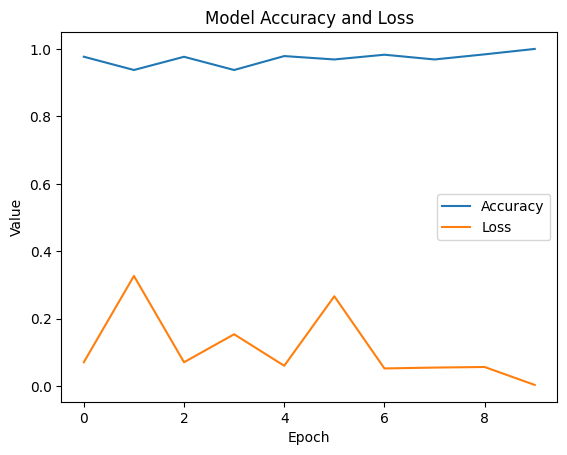

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Loss'])
plt.show()

# save model

In [ ]:
model.save(f"{model_name}.keras")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite file
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75/assets


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75/assets


Saved artifact at '/var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  6010126160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079024016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079022288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6010125776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6010125968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6010119632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079023632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079024784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079024400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079024208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6079021328: TensorS

W0000 00:00:1760521269.879621 24783483 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1760521269.879659 24783483 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-10-15 16:41:09.879916: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75
2025-10-15 16:41:09.888490: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-10-15 16:41:09.888542: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75
2025-10-15 16:41:09.977671: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-10-15 16:41:10.523603: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpy5vxmh75
2025-10-15 16:41:10.641098: I tensorflow/cc/saved_model/loader.c

# test model

In [5]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=f"{model_name}.tflite")
interpreter.allocate_tensors()

/opt/anaconda3/envs/ai-rhn/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape'][1:3]  # (224, 224)

In [7]:
# List of labels A-Z
labels = list(string.ascii_uppercase)

In [8]:
from IPython.display import display, clear_output
import cv2
import numpy as np
from PIL import Image
import time


cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        img = cv2.resize(frame, (224, 224))
        input_data = np.expand_dims(img.astype(np.float32) / 255.0, axis=0)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        output = interpreter.get_tensor(output_details[0]['index'])
        pred = np.argmax(output)
        letter = labels[pred] if pred < len(labels) else "?"

        cv2.putText(frame, f"Pred: {letter}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        clear_output(wait=True)
        display(Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))

finally:
    cap.release()
    time.sleep(0.5)
    del cap
    cv2.VideoCapture(0).release()
    cv2.destroyAllWindows()
    print("Camera released.")


Camera released.


KeyboardInterrupt: 